**Project Overview**

I'll use the Iris dataset for this Unsupervised Learning project, The goal will be to identify clusters within the Iris dataset without prior knowledge of the actual labels and then compare the clusters with the true species to assess the effectiveness of the clustering.

test 2

**Loading the Dataset**

The Iris dataset is a well-known dataset in the field of machine learning and statistics. It contains 150 instances, with four features each: sepal length, sepal width, petal length, and petal width. The dataset also includes a target variable indicating the species of the iris flower (Setosa, Versicolour, and Virginica).

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Create a DataFrame for better data handling
df = pd.DataFrame(data, columns=feature_names)
df['species'] = target  # This column will be used only for comparison later

**Exploratory Data Analysis (EDA)**

Before proceeding with clustering, it's essential to understand the data. This includes checking for missing values, visualizing the distributions of the features, and computing summary statistics.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


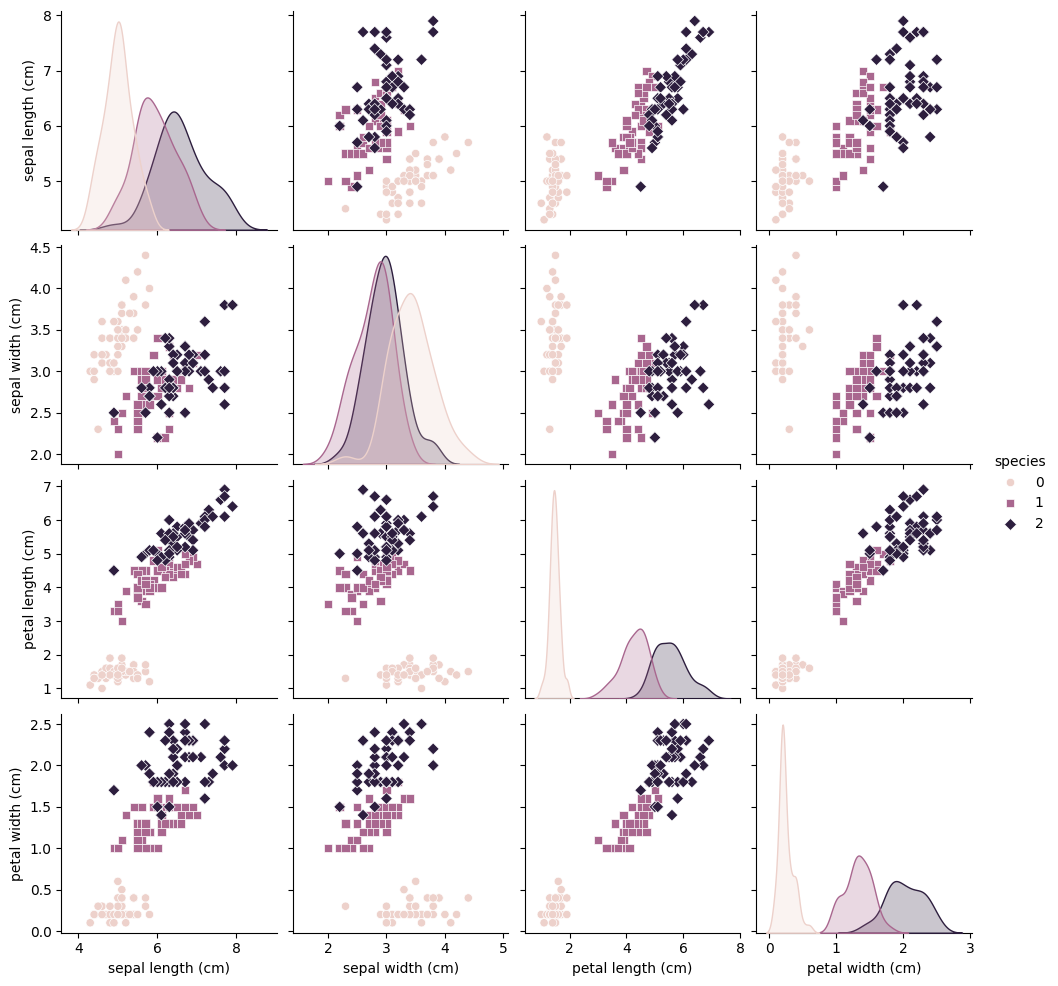

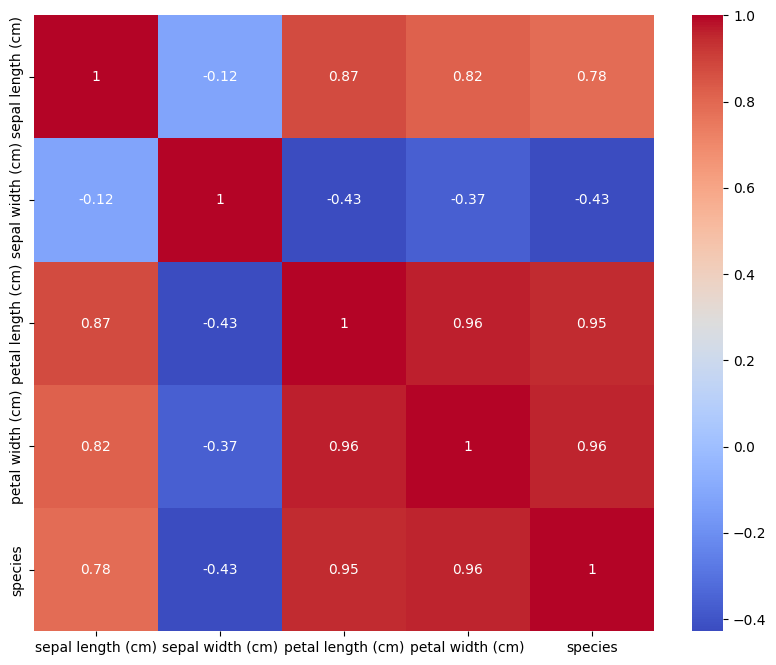

In [ ]:
# Basic information about the dataset
df.info()

# Summary statistics
df.describe()

# Pairplot to visualize relationships between features
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**K-Means Clustering**

**Preprocessing**

Standardizing the features is crucial for K-Means clustering because it is sensitive to the scale of the data. Standardization involves scaling the features to have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['species'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Finding the Optimal Number of Clusters**

The optimal number of clusters is not known beforehand in Unsupervised Learning. One way to determine it is by using the silhouette score, which measures how similar an object is to its own cluster compared to other clusters.

Based on the plot, the number of clusters with the highest silhouette score is chosen as the optimal number.

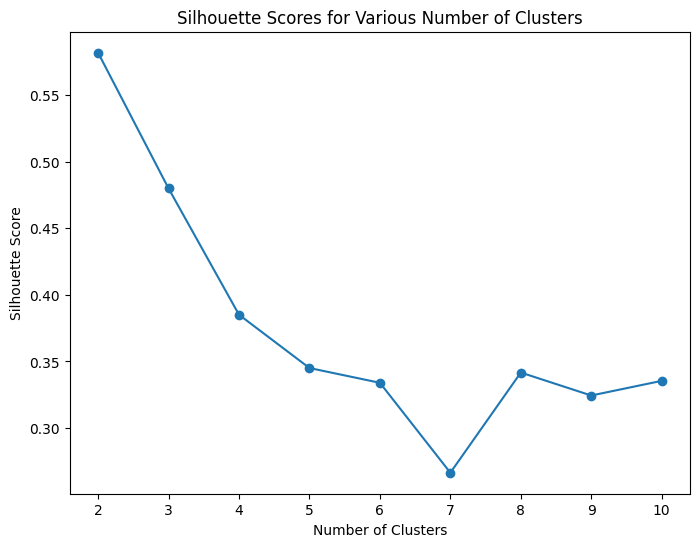

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
for k in range(2, 11):  # Trying values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

**Applying K-Means Clustering**

With the optimal number of clusters determined, we can now apply K-Means clustering to the dataset.

In [ ]:
# Choose the number of clusters based on silhouette score
optimal_clusters = 3

# Train K-Means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataframe
df['cluster'] = cluster_labels

**Visualizing the Clusters**

Visualizing the clusters helps in understanding the structure of the data and the effectiveness of the clustering algorithm.

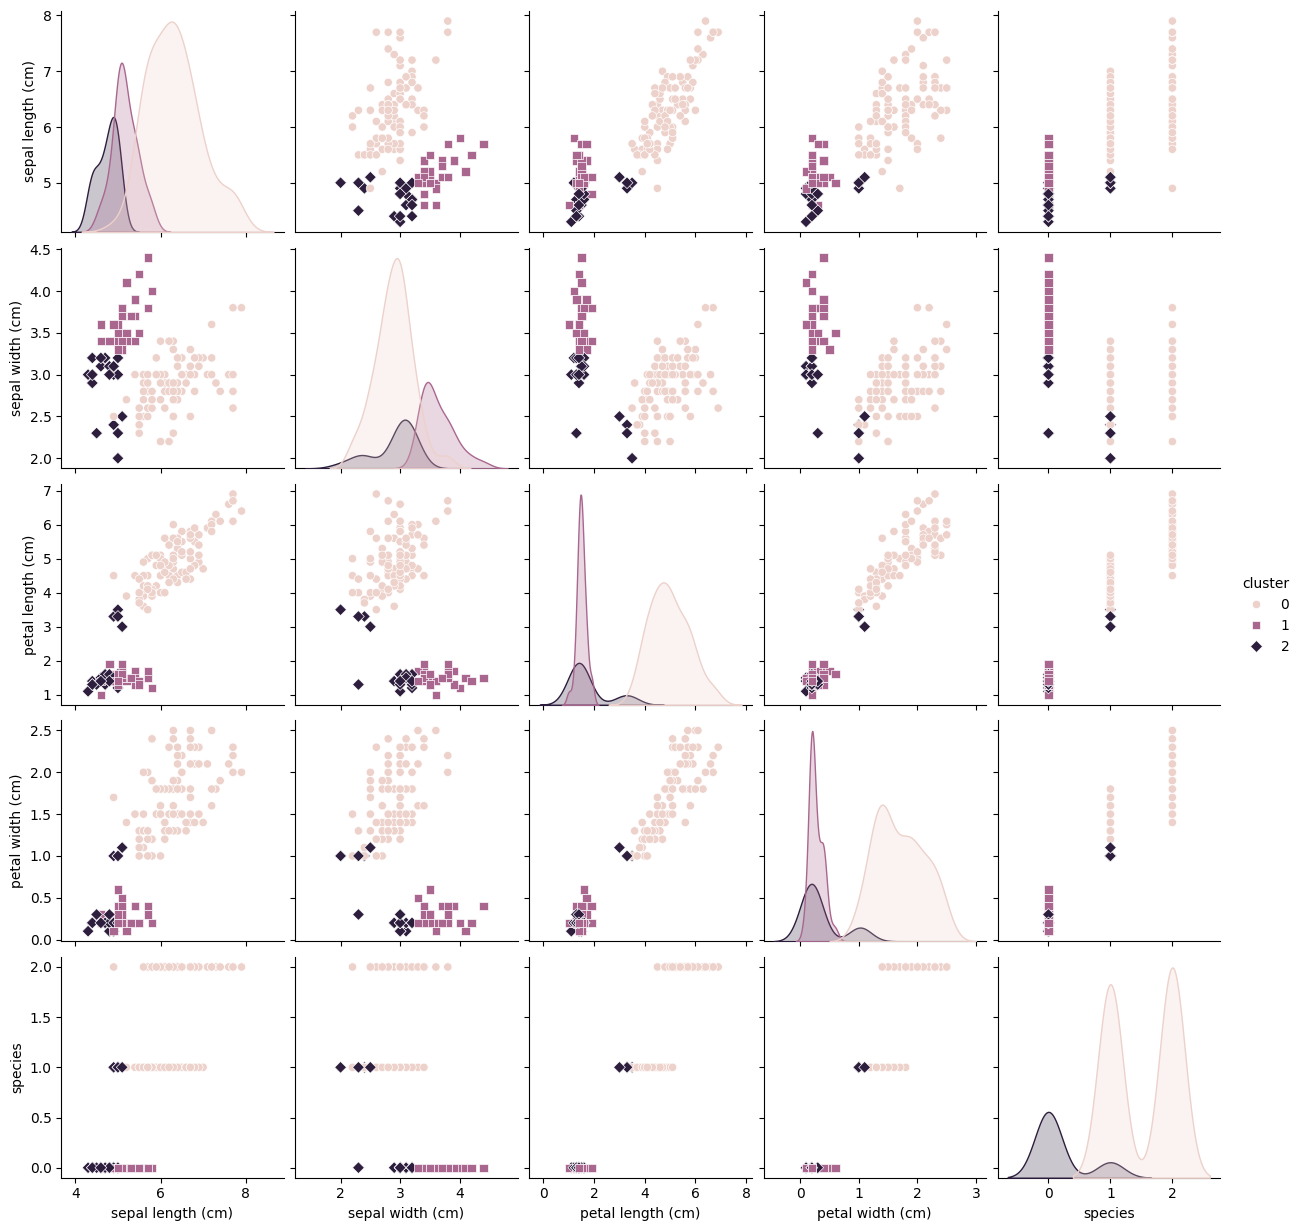

In [ ]:
# Visualize the clusters using a pairplot
sns.pairplot(df, hue='cluster', markers=["o", "s", "D"])
plt.show()

**Hierarchical Clustering**

Hierarchical Clustering creates a tree-like structure of clusters, either by agglomerating (bottom-up) or dividing (top-down) the data points.

Perform hierarchical clustering using the linkage function with the 'ward' method, which minimizes the variance within each cluster.

I'll use the scipy library for the clustering and matplotlib for visualization.

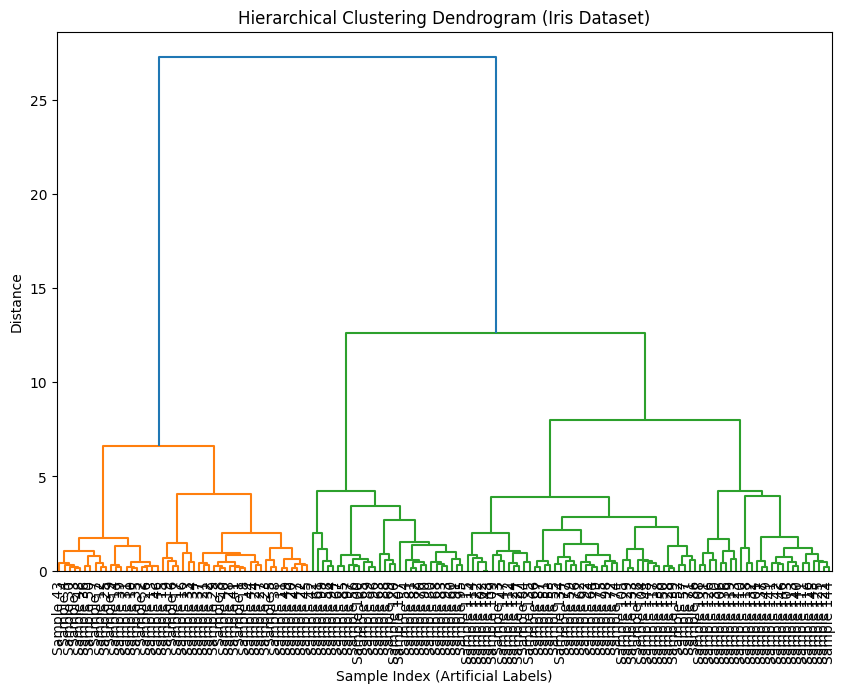

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Hierarchical Clustering
Z = linkage(X_scaled, 'ward')  # 'ward' method minimizes the variance within each cluster
sample_labels = [f'Sample {i+1}' for i in range(X.shape[0])]


plt.figure(figsize=(10, 7))
dendrogram(Z, labels=sample_labels, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Sample Index (Artificial Labels)')
plt.ylabel('Distance')
plt.show()

**Comparing Clusters with Actual Labels**

Although we didn't use the species labels for clustering, it's interesting to compare the clusters with the actual species to see how well the clustering algorithm performed.

The comparison table shows how many instances of each species were assigned to each cluster. The normalized table provides proportions, making it easier to interpret.

In [ ]:
# Create a confusion matrix-like table to compare clusters with actual species
comparison = pd.crosstab(df['species'], df['cluster'])
print(comparison)

# Normalize the comparison table to get proportions
comparison_normalized = comparison.div(comparison.sum(axis=1), axis=0)
print(comparison_normalized)

cluster   0   1   2
species            
0         0  33  17
1        46   0   4
2        50   0   0
cluster     0     1     2
species                  
0        0.00  0.66  0.34
1        0.92  0.00  0.08
2        1.00  0.00  0.00


**Conclusion**

This project was implemented with K-Means clustering and Hierarchical Clustering to the Iris dataset in an Unsupervised Learning context. I cluster the dataset, visualize the clusters, and compare them with the actual species labels to assess the clustering's effectiveness.

**K-Means Clustering**

The silhouette score was used to determine the optimal number of clusters, but other methods could also be considered.
Generally, K-Means clustering on the Iris dataset achieves good performance in terms of the metrics.

**Hierarchical Clustering**

Standardize the features using StandardScaler to ensure all features contribute equally to the distance calculations.
Perform hierarchical clustering using the linkage function with the 'ward' method, which minimizes the variance within each cluster.

**Comparison and Conclusion**

Both K-Means and Hierarchical Clustering can achieve good performance on the Iris dataset in terms of clustering accuracy and interpretability. The choice between the two methods may depend on the specific requirements of the analysis, including the need for speed, scalability, flexibility, and interpretability.